## Reproduce Supp. Fig. 8
Radar plot of deep mutational scanning stability data from natural and de-novo designed proteins (Rocklin 2017). Validation set. Comparison with the best-performing baseline.

In [1]:
import os
import pandas as pd
import sys
import os
from subprocess import call

#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
sys.path.append('../../')
from common.validation_tools import regr_datasets, subsets, metrics, reps, transfer_datasets, pearson
import common.validation_tools
from IPython.display import display, HTML
import numpy as np

import random
from scipy.stats import ttest_1samp
from sklearn.externals import joblib
from matplotlib.lines import Line2D

from common import plot_style_utils

random.seed(42)
np.random.seed(42)

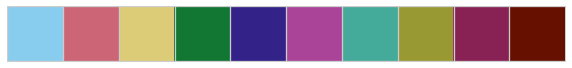

In [2]:
plot_style_utils.set_pub_plot_context()
sns.palplot(sns.color_palette())

In [3]:
all_df = pd.read_pickle("../../data/for_supplement_regr_all_results_table.pkl")
all_df['rocklin_ssm2']  # gives ya series of dfs - one for each subset

phenotype_name
EEHEE_rd3_0037.pdb_ssm2_stability                               avg     stdev
256_a...
EEHEE_rd3_1498.pdb_ssm2_stability                               avg     stdev
tfidf...
EEHEE_rd3_1702.pdb_ssm2_stability                               avg     stdev
mean ...
EEHEE_rd3_1716.pdb_ssm2_stability                               avg     stdev
mean ...
EHEE_0882.pdb_ssm2_stability                                    avg     stdev
tfidf...
EHEE_rd2_0005.pdb_ssm2_stability                                avg     stdev
mean ...
EHEE_rd3_0015.pdb_ssm2_stability                                avg     stdev
tfidf...
HEEH_rd2_0779.pdb_ssm2_stability                                avg     stdev
mean ...
HEEH_rd3_0223.pdb_ssm2_stability                                avg     stdev
tfidf...
HEEH_rd3_0726.pdb_ssm2_stability                                avg     stdev
tfidf...
HEEH_rd3_0872.pdb_ssm2_stability                                avg     stdev
arnol...
HHH_0142.pdb_ssm2_stability 

In [4]:
all_df

dataset                    phenotype_name                   
leuenberger                human_tm                                                         avg     stdev
3gra...
                           ecoli_tm                                                         avg     stdev
3gra...
                           thermophilus_tm                                                  avg     stdev
arno...
                           yeast_tm                                                         avg     stdev
avg_...
                           full                                                              avg      stdev
me...
solubility                 ecoli_solubility_score                                             avg      stdev
m...
                           yeast_solubility_score                                            avg       stdev
6...
                           full                                                               avg      stdev
m...
arnold_T50                 

In [5]:
all_df['rocklin_ssm2_nat_eng']  # gives ya series of dfs - one for each subset

phenotype_name
natural                                  avg     stdev
mean ...
engineered                               avg     stdev
mean ...
dtype: object

In [6]:
all_df['rocklin_ssm2_nat_eng'].natural

,avg,stdev
mean,0.125984,0.009559
tfidf_3grams,0.066043,0.005973
arnold_random_3_7,0.064319,0.005682
3grams,0.062159,0.005243
simple_freq_and_len,0.059402,0.005603
arnold_uniform_4_1,0.058219,0.005240
simple_freq_plus,0.057690,0.005706
64_avg_hidden,0.055667,0.003992
arnold_scrambled_3_5,0.055646,0.004711
64_final_cell,0.054439,0.005904


In [7]:
all_df['rocklin_ssm2_nat_eng'].engineered

,avg,stdev
mean,0.147964,0.005288
arnold_uniform_4_1,0.060739,0.004918
arnold_random_3_7,0.059186,0.004535
simple_freq_and_len,0.056087,0.004295
simple_freq_plus,0.054537,0.004416
arnold_original_3_7,0.047836,0.003909
64_final_hidden,0.045539,0.003904
3grams,0.045432,0.003505
arnold_scrambled_3_5,0.045298,0.003538
tfidf_3grams,0.044662,0.003412


In [8]:
all_df['rocklin_ssm2'].villin_ssm2_stability

,avg,stdev
tfidf_3grams,0.155553,0.029804
mean,0.097467,0.015595
arnold_uniform_4_1,0.091556,0.015283
arnold_random_3_7,0.088425,0.015803
simple_freq_and_len,0.085261,0.013818
simple_freq_plus,0.083333,0.013303
arnold_scrambled_3_5,0.078558,0.013362
3grams,0.076712,0.013753
64_final_hidden,0.074170,0.021824
arnold_original_3_7,0.065595,0.012881


In [9]:
all_df['rocklin_ssm2'].tolist()[0]

,avg,stdev
256_avg_hidden,0.067557,0.029100
mean,0.066473,0.012178
arnold_uniform_4_1,0.060901,0.010854
arnold_random_3_7,0.057010,0.012944
3grams,0.055287,0.010898
tfidf_3grams,0.051783,0.010895
simple_freq_and_len,0.044142,0.008782
simple_freq_plus,0.043302,0.009017
64_avg_hidden,0.041286,0.010525
64_final_hidden,0.038996,0.007597


In [10]:
# Make a series of MSE for all_1900
dfs = all_df['rocklin_ssm2'][:-1] # drop the full
names = []
avgs = []
is_designed = []
for name,df in dfs.iteritems():
    print(name)
    if '.pdb' in name:
        is_designed.append(True)
    else:
        is_designed.append(False)
    name = name.split('_ssm2')[0].split(".")[0]
    print(name)
    names.append(name)
    avgs.append(df.avg.all_1900)
    
print(names)
print(avgs)
print(is_designed)

EEHEE_rd3_0037.pdb_ssm2_stability
EEHEE_rd3_0037
EEHEE_rd3_1498.pdb_ssm2_stability
EEHEE_rd3_1498
EEHEE_rd3_1702.pdb_ssm2_stability
EEHEE_rd3_1702
EEHEE_rd3_1716.pdb_ssm2_stability
EEHEE_rd3_1716
EHEE_0882.pdb_ssm2_stability
EHEE_0882
EHEE_rd2_0005.pdb_ssm2_stability
EHEE_rd2_0005
EHEE_rd3_0015.pdb_ssm2_stability
EHEE_rd3_0015
HEEH_rd2_0779.pdb_ssm2_stability
HEEH_rd2_0779
HEEH_rd3_0223.pdb_ssm2_stability
HEEH_rd3_0223
HEEH_rd3_0726.pdb_ssm2_stability
HEEH_rd3_0726
HEEH_rd3_0872.pdb_ssm2_stability
HEEH_rd3_0872
HHH_0142.pdb_ssm2_stability
HHH_0142
HHH_rd2_0134.pdb_ssm2_stability
HHH_rd2_0134
HHH_rd3_0138.pdb_ssm2_stability
HHH_rd3_0138
Pin1_ssm2_stability
Pin1
hYAP65_ssm2_stability
hYAP65
villin_ssm2_stability
villin
['EEHEE_rd3_0037', 'EEHEE_rd3_1498', 'EEHEE_rd3_1702', 'EEHEE_rd3_1716', 'EHEE_0882', 'EHEE_rd2_0005', 'EHEE_rd3_0015', 'HEEH_rd2_0779', 'HEEH_rd3_0223', 'HEEH_rd3_0726', 'HEEH_rd3_0872', 'HHH_0142', 'HHH_rd2_0134', 'HHH_rd3_0138', 'Pin1', 'hYAP65', 'villin']
[0.0135434941

In [11]:
# Check that a df score matches
dfs[2]

,avg,stdev
mean,0.024442,0.008729
arnold_random_3_7,0.024154,0.008470
tfidf_2grams,0.023565,0.007106
tfidf_3grams,0.023507,0.008451
2grams,0.022724,0.006921
3grams,0.022183,0.007907
arnold_uniform_4_1,0.021775,0.007790
arnold_original_3_7,0.019579,0.006313
simple_freq_plus,0.017916,0.006262
simple_freq_and_len,0.017840,0.005964


In [12]:
cut = pd.Series(index=names, data=avgs).sort_values()
cut

HEEH_rd3_0872     0.004988
HEEH_rd3_0726     0.005886
HHH_rd2_0134      0.006971
EEHEE_rd3_0037    0.013543
HEEH_rd3_0223     0.013992
HHH_rd3_0138      0.014128
EEHEE_rd3_1702    0.014154
Pin1              0.015601
HHH_0142          0.015779
hYAP65            0.017801
EEHEE_rd3_1716    0.017951
HEEH_rd2_0779     0.022431
EEHEE_rd3_1498    0.023288
villin            0.029732
EHEE_rd2_0005     0.031863
EHEE_rd3_0015     0.035350
EHEE_0882         0.045059
dtype: float64

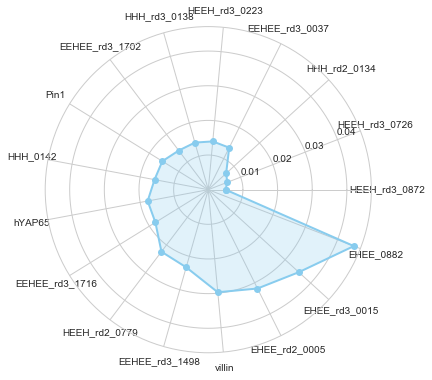

In [13]:
plot_style_utils.set_pub_plot_context(context="notebook")
labels=cut.index
stats=cut.values

angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.grid(True)

In [14]:
# Now do the same but with pearson R
all_df = pd.read_pickle("../../data/for_supplement_regr_all_results_table_pearson_r.pkl")
all_df['rocklin_ssm2']  # gives ya series of dfs - one for each subset

phenotype_name
EEHEE_rd3_0037.pdb_ssm2_stability                               avg     stdev
all_a...
EEHEE_rd3_1498.pdb_ssm2_stability                               avg     stdev
all_a...
EEHEE_rd3_1702.pdb_ssm2_stability                               avg     stdev
RGN_a...
EEHEE_rd3_1716.pdb_ssm2_stability                               avg     stdev
RGN_f...
EHEE_0882.pdb_ssm2_stability                                    avg     stdev
avg_h...
EHEE_rd2_0005.pdb_ssm2_stability                                avg     stdev
avg_h...
EHEE_rd3_0015.pdb_ssm2_stability                                avg     stdev
all_a...
HEEH_rd2_0779.pdb_ssm2_stability                                avg     stdev
RGN_f...
HEEH_rd3_0223.pdb_ssm2_stability                                avg     stdev
RGN_f...
HEEH_rd3_0726.pdb_ssm2_stability                                avg     stdev
all_1...
HEEH_rd3_0872.pdb_ssm2_stability                                    avg     stdev
a...
HHH_0142.pdb_ssm2_stability 

In [15]:
all_df['rocklin_ssm2_nat_eng'].natural

,avg,stdev
RGN_avg_hidden,0.915662,0.012497
avg_hidden,0.913721,0.012184
all_avg_hidden,0.912330,0.012145
all_1900,0.909204,0.012319
final_cell,0.906931,0.011779
all_final_cell,0.905679,0.012266
RGN_final_cell,0.905180,0.010809
final_hidden,0.886893,0.016500
all_256,0.846491,0.025628
RGN,0.840124,0.025181


In [16]:
all_df['rocklin_ssm2_nat_eng'].engineered

,avg,stdev
all_final_cell,0.904626,0.009602
final_cell,0.903646,0.009584
RGN_final_cell,0.901933,0.010724
all_avg_hidden,0.900179,0.008034
RGN_avg_hidden,0.899418,0.010635
all_1900,0.899247,0.009575
avg_hidden,0.899191,0.008222
final_hidden,0.891275,0.010698
RGN,0.891194,0.011408
all_256,0.888347,0.010007


In [17]:
# Make a series of pearsonR for all_1900
dfs = all_df['rocklin_ssm2'][:-1] # drop the full
names = []
avgs = []
is_designed = []
for name,df in dfs.iteritems():
    print(name)
    if '.pdb' in name:
        is_designed.append(True)
    else:
        is_designed.append(False)
    name = name.split('_ssm2')[0].split(".")[0]
    print(name)
    names.append(name)
    avgs.append(df.avg.all_1900)
    
print(names)
print(avgs)
print(is_designed)

EEHEE_rd3_0037.pdb_ssm2_stability
EEHEE_rd3_0037
EEHEE_rd3_1498.pdb_ssm2_stability
EEHEE_rd3_1498
EEHEE_rd3_1702.pdb_ssm2_stability
EEHEE_rd3_1702
EEHEE_rd3_1716.pdb_ssm2_stability
EEHEE_rd3_1716
EHEE_0882.pdb_ssm2_stability
EHEE_0882
EHEE_rd2_0005.pdb_ssm2_stability
EHEE_rd2_0005
EHEE_rd3_0015.pdb_ssm2_stability
EHEE_rd3_0015
HEEH_rd2_0779.pdb_ssm2_stability
HEEH_rd2_0779
HEEH_rd3_0223.pdb_ssm2_stability
HEEH_rd3_0223
HEEH_rd3_0726.pdb_ssm2_stability
HEEH_rd3_0726
HEEH_rd3_0872.pdb_ssm2_stability
HEEH_rd3_0872
HHH_0142.pdb_ssm2_stability
HHH_0142
HHH_rd2_0134.pdb_ssm2_stability
HHH_rd2_0134
HHH_rd3_0138.pdb_ssm2_stability
HHH_rd3_0138
Pin1_ssm2_stability
Pin1
hYAP65_ssm2_stability
hYAP65
villin_ssm2_stability
villin
['EEHEE_rd3_0037', 'EEHEE_rd3_1498', 'EEHEE_rd3_1702', 'EEHEE_rd3_1716', 'EHEE_0882', 'EHEE_rd2_0005', 'EHEE_rd3_0015', 'HEEH_rd2_0779', 'HEEH_rd3_0223', 'HEEH_rd3_0726', 'HEEH_rd3_0872', 'HHH_0142', 'HHH_rd2_0134', 'HHH_rd3_0138', 'Pin1', 'hYAP65', 'villin']
[0.9026912655

In [18]:
cut = pd.DataFrame({"avg":avgs, "is_designed":is_designed},
    index=names
                  ).sort_values(by="avg")

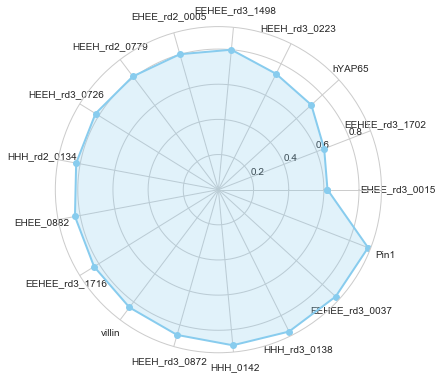

In [19]:
plot_style_utils.set_pub_plot_context(context="notebook")
cut_tmp = cut.avg
labels=cut_tmp.index
stats=cut_tmp.values

angles=np.linspace(0, 2.0*np.pi, len(labels), endpoint=False)
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.grid(True)

In [20]:
# Use the full dataframe to pick the best performing baseline
all_df['rocklin_ssm2'][-1].sort_values(by="avg")



,avg,stdev
arnold_uniform_4_1,0.765838,0.015928
arnold_random_3_7,0.777240,0.016336
simple_freq_and_len,0.785371,0.014224
simple_freq_plus,0.786921,0.014214
arnold_original_3_7,0.813633,0.012431
arnold_scrambled_3_5,0.822834,0.009731
64_final_hidden,0.828016,0.011166
64_avg_hidden,0.830990,0.010657
tfidf_3grams,0.833099,0.009878
3grams,0.834078,0.009993


In [21]:
# Make a series of pearsonR for all_1900
dfs = all_df['rocklin_ssm2'][:-1] # drop the full
RGN_names = []
RGN_avgs = []
RGN_is_designed = []
for name,df in dfs.iteritems():
    print(name)
    if '.pdb' in name:
        RGN_is_designed.append(True)
    else:
        RGN_is_designed.append(False)
    name = name.split('_ssm2')[0].split(".")[0]
    print(name)
    RGN_names.append(name)
    RGN_avgs.append(df.avg.RGN)
    
print(RGN_names)
print(RGN_avgs)
print(RGN_is_designed)

EEHEE_rd3_0037.pdb_ssm2_stability
EEHEE_rd3_0037
EEHEE_rd3_1498.pdb_ssm2_stability
EEHEE_rd3_1498
EEHEE_rd3_1702.pdb_ssm2_stability
EEHEE_rd3_1702
EEHEE_rd3_1716.pdb_ssm2_stability
EEHEE_rd3_1716
EHEE_0882.pdb_ssm2_stability
EHEE_0882
EHEE_rd2_0005.pdb_ssm2_stability
EHEE_rd2_0005
EHEE_rd3_0015.pdb_ssm2_stability
EHEE_rd3_0015
HEEH_rd2_0779.pdb_ssm2_stability
HEEH_rd2_0779
HEEH_rd3_0223.pdb_ssm2_stability
HEEH_rd3_0223
HEEH_rd3_0726.pdb_ssm2_stability
HEEH_rd3_0726
HEEH_rd3_0872.pdb_ssm2_stability
HEEH_rd3_0872
HHH_0142.pdb_ssm2_stability
HHH_0142
HHH_rd2_0134.pdb_ssm2_stability
HHH_rd2_0134
HHH_rd3_0138.pdb_ssm2_stability
HHH_rd3_0138
Pin1_ssm2_stability
Pin1
hYAP65_ssm2_stability
hYAP65
villin_ssm2_stability
villin
['EEHEE_rd3_0037', 'EEHEE_rd3_1498', 'EEHEE_rd3_1702', 'EEHEE_rd3_1716', 'EHEE_0882', 'EHEE_rd2_0005', 'EHEE_rd3_0015', 'HEEH_rd2_0779', 'HEEH_rd3_0223', 'HEEH_rd3_0726', 'HEEH_rd3_0872', 'HHH_0142', 'HHH_rd2_0134', 'HHH_rd3_0138', 'Pin1', 'hYAP65', 'villin']
[0.8460766226

In [22]:
RGN_cut = pd.DataFrame({"avg":RGN_avgs, "is_designed":RGN_is_designed},
    index=names
                  ).loc[cut.index]
RGN_cut

,avg,is_designed
EHEE_rd3_0015,0.462790,True
EEHEE_rd3_1702,0.672820,True
hYAP65,0.630503,False
HEEH_rd3_0223,0.707277,True
EEHEE_rd3_1498,0.802215,True
EHEE_rd2_0005,0.579573,True
HEEH_rd2_0779,0.731172,True
HEEH_rd3_0726,0.793960,True
HHH_rd2_0134,0.823189,True
EHEE_0882,0.796235,True


EHEE_rd3_0015     0.620599
EEHEE_rd3_1702    0.645251
hYAP65            0.715471
HEEH_rd3_0223     0.736333
EEHEE_rd3_1498    0.799667
EHEE_rd2_0005     0.801246
HEEH_rd2_0779     0.807609
HEEH_rd3_0726     0.822407
HHH_rd2_0134      0.823339
EHEE_0882         0.830295
EEHEE_rd3_1716    0.831951
villin            0.839642
HEEH_rd3_0872     0.859189
HHH_0142          0.889095
HHH_rd3_0138      0.901650
EEHEE_rd3_0037    0.902691
Pin1              0.913158
Name: avg, dtype: float64
EHEE_rd3_0015     0.462790
EEHEE_rd3_1702    0.672820
hYAP65            0.630503
HEEH_rd3_0223     0.707277
EEHEE_rd3_1498    0.802215
EHEE_rd2_0005     0.579573
HEEH_rd2_0779     0.731172
HEEH_rd3_0726     0.793960
HHH_rd2_0134      0.823189
EHEE_0882         0.796235
EEHEE_rd3_1716    0.811690
villin            0.786406
HEEH_rd3_0872     0.784302
HHH_0142          0.735726
HHH_rd3_0138      0.774546
EEHEE_rd3_0037    0.846077
Pin1              0.819620
Name: avg, dtype: float64


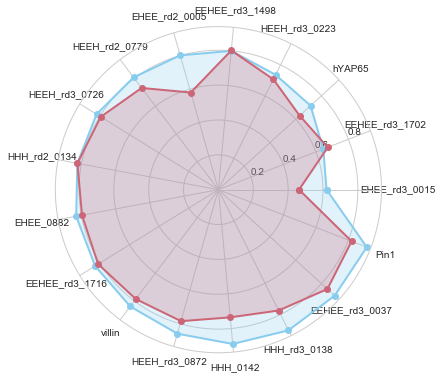

In [23]:
# Show RGN and UniRep
plot_style_utils.set_pub_plot_context(context="notebook")
palette = sns.color_palette()
cut_tmp = cut.copy().avg
print(cut_tmp)
labels=cut_tmp.index
stats=cut_tmp.values

angles=np.linspace(0, 2.0*np.pi, len(labels), endpoint=False)
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, color=palette[0])
ax.fill(angles, stats, alpha=0.25, color=palette[0])

cut_tmp = RGN_cut.copy().avg
print(cut_tmp)
labels=cut_tmp.index
stats=cut_tmp.values
angles=np.linspace(0, 2.0*np.pi, len(labels), endpoint=False)
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))
ax.plot(angles, stats, 'o-', linewidth=2, color=palette[1])
ax.fill(angles, stats, alpha=0.25, color=palette[1])
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.grid(True)

In [24]:
# Make a series of pearsonR for 2grams
dfs = all_df['rocklin_ssm2'][:-1] # drop the full
baseline_names = []
baseline_avgs = []
baseline_is_designed = []
for name,df in dfs.iteritems():
    print(name)
    if '.pdb' in name:
        baseline_is_designed.append(True)
    else:
        baseline_is_designed.append(False)
    name = name.split('_ssm2')[0].split(".")[0]
    print(name)
    baseline_names.append(name)
    baseline_avgs.append(df.avg['2grams'])
    
print(baseline_names)
print(baseline_avgs)
print(baseline_is_designed)

EEHEE_rd3_0037.pdb_ssm2_stability
EEHEE_rd3_0037
EEHEE_rd3_1498.pdb_ssm2_stability
EEHEE_rd3_1498
EEHEE_rd3_1702.pdb_ssm2_stability
EEHEE_rd3_1702
EEHEE_rd3_1716.pdb_ssm2_stability
EEHEE_rd3_1716
EHEE_0882.pdb_ssm2_stability
EHEE_0882
EHEE_rd2_0005.pdb_ssm2_stability
EHEE_rd2_0005
EHEE_rd3_0015.pdb_ssm2_stability
EHEE_rd3_0015
HEEH_rd2_0779.pdb_ssm2_stability
HEEH_rd2_0779
HEEH_rd3_0223.pdb_ssm2_stability
HEEH_rd3_0223
HEEH_rd3_0726.pdb_ssm2_stability
HEEH_rd3_0726
HEEH_rd3_0872.pdb_ssm2_stability
HEEH_rd3_0872
HHH_0142.pdb_ssm2_stability
HHH_0142
HHH_rd2_0134.pdb_ssm2_stability
HHH_rd2_0134
HHH_rd3_0138.pdb_ssm2_stability
HHH_rd3_0138
Pin1_ssm2_stability
Pin1
hYAP65_ssm2_stability
hYAP65
villin_ssm2_stability
villin
['EEHEE_rd3_0037', 'EEHEE_rd3_1498', 'EEHEE_rd3_1702', 'EEHEE_rd3_1716', 'EHEE_0882', 'EHEE_rd2_0005', 'EHEE_rd3_0015', 'HEEH_rd2_0779', 'HEEH_rd3_0223', 'HEEH_rd3_0726', 'HEEH_rd3_0872', 'HHH_0142', 'HHH_rd2_0134', 'HHH_rd3_0138', 'Pin1', 'hYAP65', 'villin']
[0.7076511946

In [25]:
baseline_cut = pd.DataFrame({"avg":baseline_avgs, "is_designed":baseline_is_designed},
    index=names
                  ).loc[cut.index]
baseline_cut

,avg,is_designed
EHEE_rd3_0015,0.405454,True
EEHEE_rd3_1702,0.407087,True
hYAP65,0.526881,False
HEEH_rd3_0223,0.600877,True
EEHEE_rd3_1498,0.500979,True
EHEE_rd2_0005,0.653046,True
HEEH_rd2_0779,0.543081,True
HEEH_rd3_0726,0.576638,True
HHH_rd2_0134,0.564800,True
EHEE_0882,0.598202,True


EHEE_rd3_0015     0.620599
EEHEE_rd3_1702    0.645251
hYAP65            0.715471
HEEH_rd3_0223     0.736333
EEHEE_rd3_1498    0.799667
EHEE_rd2_0005     0.801246
HEEH_rd2_0779     0.807609
HEEH_rd3_0726     0.822407
HHH_rd2_0134      0.823339
EHEE_0882         0.830295
EEHEE_rd3_1716    0.831951
villin            0.839642
HEEH_rd3_0872     0.859189
HHH_0142          0.889095
HHH_rd3_0138      0.901650
EEHEE_rd3_0037    0.902691
Pin1              0.913158
Name: avg, dtype: float64


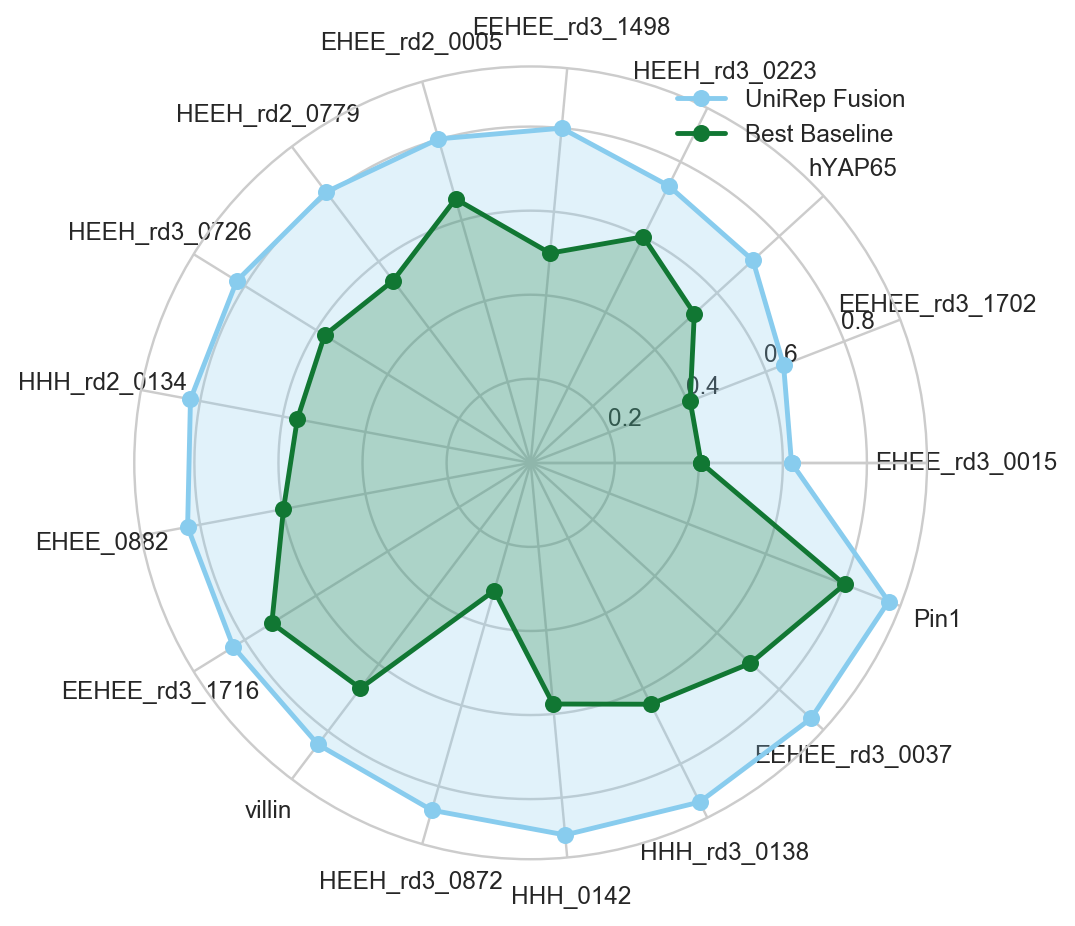

In [26]:
# Show UniRep and best baseline
plot_style_utils.set_pub_plot_context(context="notebook")
palette = sns.color_palette()
fig=plt.figure(figsize=(6,6), dpi=175)
ax = fig.add_subplot(111, polar=True)

cut_tmp = cut.copy().avg
print(cut_tmp)
labels=cut_tmp.index
stats=cut_tmp.values

angles=np.linspace(0, 2.0*np.pi, len(labels), endpoint=False)
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

ax.plot(angles, stats, 'o-', linewidth=2, color=palette[0], label="UniRep Fusion")
ax.fill(angles, stats, alpha=0.25, color=palette[0])

cut_tmp = baseline_cut.copy().avg
#print(cut_tmp)
labels=cut_tmp.index
stats=cut_tmp.values
angles=np.linspace(0, 2.0*np.pi, len(labels), endpoint=False)
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))
ax.plot(angles, stats, 'o-', linewidth=2, color=palette[3], label="Best Baseline")
ax.fill(angles, stats, alpha=0.25, color=palette[3])
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.grid(True)
ax.legend()
plot_style_utils.save_for_pub(fig=fig, path='./img/supp_fig8', dpi=175)
# Will fix label sizing in post